Importing packages and creating the DataFrame

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

Calculating average and median annual income of the customers

In [92]:
average_income = df['Annual Income (k$)'].mean()
median_income = df['Annual Income (k$)'].median()

print(f"Average annual income of customers: ${average_income}K")
print(f"Median annual income of customers: ${median_income}K")
if average_income > median_income:
    print("The data is skewed to the right")
elif average_income < median_income:
    print("The data is skewed to the left")
else:
    print("The data is normal")



Average annual income of customers: $60.56K
Median annual income of customers: $61.5K
The data is skewed to the left


Creating a box plot of the data.

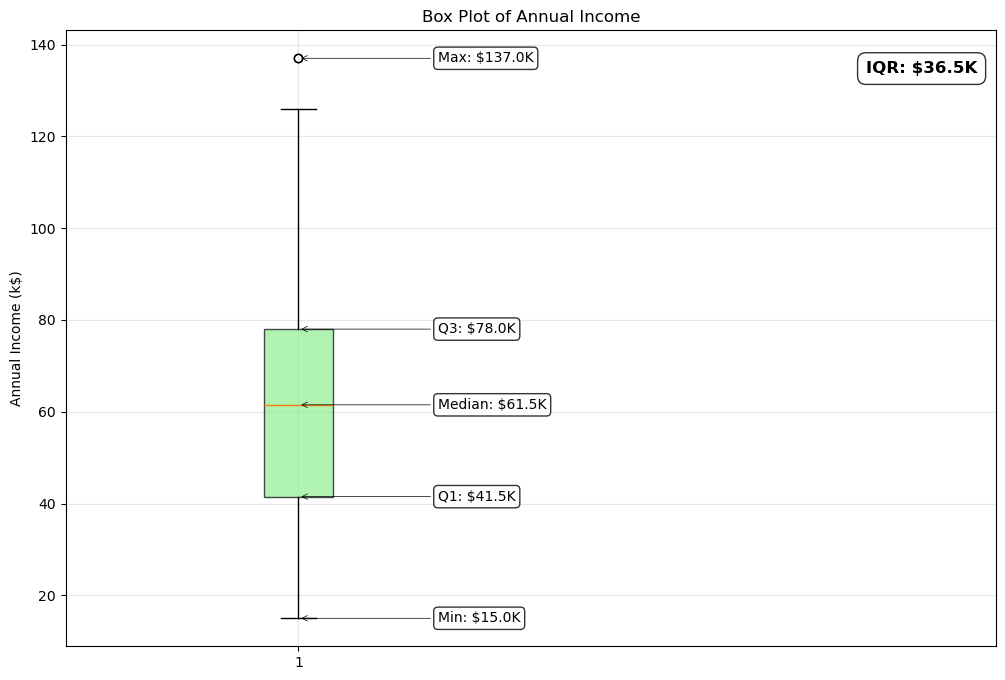

In [93]:
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(df['Annual Income (k$)'], patch_artist = True, boxprops = dict(facecolor = 'lightgreen', alpha = 0.7))

stats = df['Annual Income (k$)'].describe()

iqr = stats['75%'] - stats['25%']

values = {
    'Min': stats['min'],
    'Q1': stats['25%'],
    'Median': stats['50%'],
    'Q3': stats['75%'],
    'Max': stats['max'],
}

for label, value in values.items():
    plt.annotate(f'{label}: ${value:.1f}K', xy = (1, value), xytext = (1.3, value), fontsize = 10, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'black', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

plt.text(0.98, 0.95, f'IQR: ${iqr:.1f}K', transform = plt.gca().transAxes, fontsize = 12, fontweight = 'bold', ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.5", facecolor = "white", alpha = 0.8))

plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.xlim(0.5, 2.5)
plt.grid(True, alpha = 0.3)
plt.show()

Showing the number of males vs. females


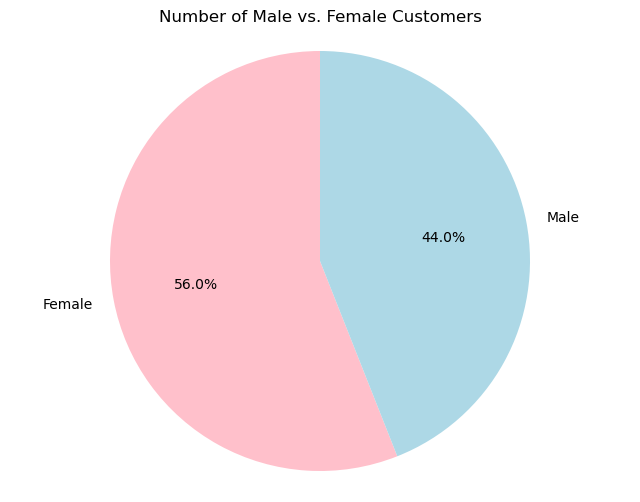

In [94]:
gender_counts = df['Genre'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['pink', 'lightblue'])
plt.title('Number of Male vs. Female Customers')
plt.axis('equal')

plt.show()

Box plot showing income of both genders

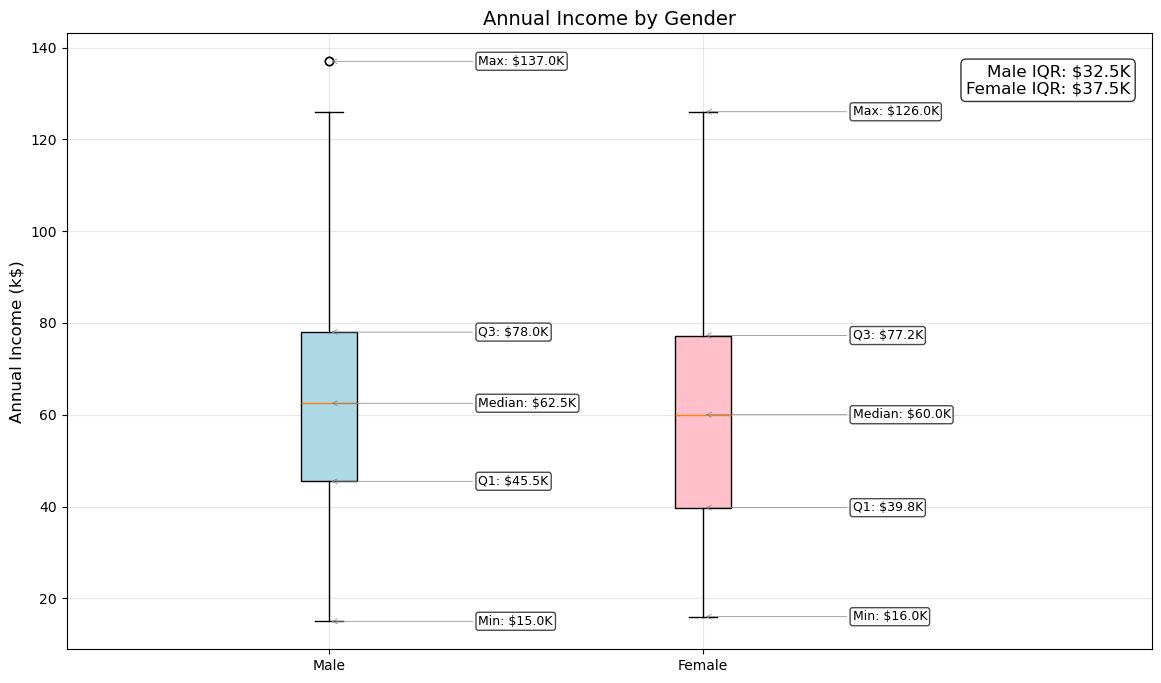

In [95]:
plt.figure(figsize=(14, 8))

male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

box_plot = plt.boxplot([male_income, female_income], tick_labels=['Male', 'Female'], patch_artist=True)

colors = ['lightblue', 'pink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

genders = ['Male', 'Female']
data_groups = [male_income, female_income]

for i, (gender, data) in enumerate(zip(genders, data_groups), 1):
    stats = data.describe()

    annotations = [
        (f'Min: ${stats["min"]:.1f}K', stats['min']),
        (f'Q1: ${stats["25%"]:.1f}K', stats['25%']),
        (f'Median: ${stats["50%"]:.1f}K', stats['50%']),
        (f'Q3: ${stats["75%"]:.1f}K', stats['75%']),
        (f'Max: ${stats["max"]:.1f}K', stats['max'])
    ]

    for j, (label, value) in enumerate(annotations):
        plt.annotate(label, xy=(i, value), xytext=(i + 0.4, value), fontsize=9, verticalalignment='center', arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

# Calculating IQR
male_stats = male_income.describe()
female_stats = female_income.describe()
male_iqr = male_stats['75%'] - male_stats['25%']
female_iqr = female_stats['75%'] - female_stats['25%']

iqr_values = f'Male IQR: ${male_iqr:.1f}K\nFemale IQR: ${female_iqr:.1f}K'

plt.text(0.98, 0.95, iqr_values, transform = plt.gca().transAxes, fontsize = 12, ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

# Title of the boxplot
plt.title('Annual Income by Gender', fontsize = 14)
plt.ylabel('Annual Income (k$)', fontsize = 12)
plt.xlim(0.3, 3.2)
plt.grid(True, alpha = 0.3)
plt.show()

Calculating the median age

In [96]:
median_age = df['Age'].median()

print(f'Median age of customers: {median_age}')

Median age of customers: 36.0


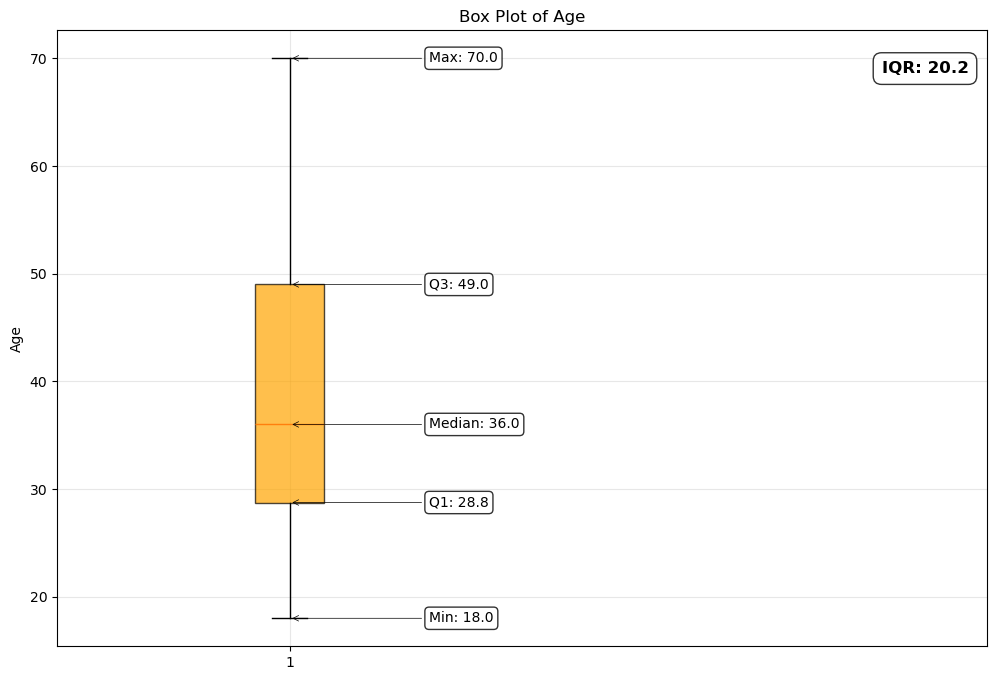

In [97]:
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(df['Age'], patch_artist = True, boxprops = dict(facecolor = 'orange', alpha = 0.7))

stats = df['Age'].describe()

iqr = stats['75%'] - stats['25%']

values = {
    'Min': stats['min'],
    'Q1': stats['25%'],
    'Median': stats['50%'],
    'Q3': stats['75%'],
    'Max': stats['max'],
}

for label, value in values.items():
    plt.annotate(f'{label}: {value:.1f}', xy = (1, value), xytext = (1.3, value), fontsize = 10, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'black', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

plt.text(0.98, 0.95, f'IQR: {iqr:.1f}', transform = plt.gca().transAxes, fontsize = 12, fontweight = 'bold', ha = 'right', va = 'top', bbox = dict(boxstyle = "round, pad = 0.5", facecolor = "white", alpha = 0.8))

plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xlim(0.5, 2.5)
plt.grid(True, alpha = 0.3)
plt.show()